In [11]:
from genMoPlan.utils import load_trajectories, ROAEstimator
import matplotlib.pyplot as plt
from genMoPlan.utils.trajectory import plot_trajectories

In [12]:
import os

os.chdir('/common/home/st1122/Projects/genMoPlan')

In [13]:
exp_path = "experiments/pendulum_lqr_5k/flow_matching/25_03_29-23_45_23_HILEN-1_HOLEN-31_HIPAD-F_HOPAD-T_STRD-1_transformer"

In [14]:
dataset = 'pendulum_lqr_5k'
num_trajs = 1000
model_state_name = 'best.pt'
batch_size = 1000
show_traj_ends = False
compare = False
only_execute_next_step = False


In [15]:
test_trajs = load_trajectories(dataset, num_trajs)
start_points = test_trajs[:, 0]

[ datasets/sequence ] Loading trajectories from data_trajectories/pendulum_lqr_5k/trajectories


100%|██████████| 1000/1000 [00:00<00:00, 1395.03it/s]


[ utils/model ] Loading model from experiments/pendulum_lqr_5k/flow_matching/25_03_29-23_45_23_HILEN-1_HOLEN-31_HIPAD-F_HOPAD-T_STRD-1_transformer/best.pt
[ utils/config ] Imported mg_diffuse.models.temporal:TemporalTransformer
[ utils/config ] Imported mg_diffuse.models.generative:FlowMatching
[ models/transformer ] Initializing TemporalTransformer with hidden_dim: 144, depth: 8, heads: 8, time_embed_dim: 144
[ utils/roa ] Run 1/1 (Remaining Time: N/A)
[ utils/trajectory ] Generating trajectories


[ utils/trajectory ] Processing trajectories: 100%|██████████| 1000/1000 [00:00<00:00, 37898.51it/s]




 Parameters:
{'step_size': 0.1, 'integration_method': 'euler'}


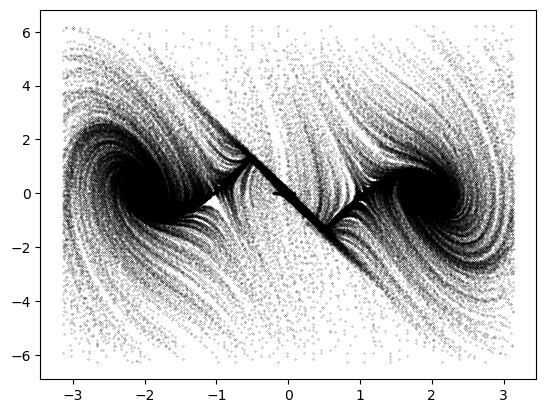

In [21]:
roa_estimator = ROAEstimator(dataset, model_state_name, exp_path, n_runs=1, batch_size=batch_size)

roa_estimator.start_points = start_points
roa_estimator.conditional_sample_kwargs = {
    "step_size": 0.1,
    "integration_method": "euler",
}

roa_estimator.generate_trajectories(compute_labels=False, discard_trajectories=False, verbose=True, save=False)



print('\n\n Parameters:')
print(roa_estimator.conditional_sample_kwargs)

trajectories = roa_estimator.trajectories[:, 0]
plt = plot_trajectories(trajectories, return_plot=True)